In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [16]:
with open("luxury_product_names.txt", "r") as file:
    luxury_products = file.readlines()

with open("daily_product_names.txt", "r") as file:
    daily_products = file.readlines()

In [18]:
luxury_df = pd.DataFrame({'product_name': luxury_products, 'brand_type': 'luxury'})
daily_df = pd.DataFrame({'product_name': daily_products, 'brand_type': 'daily'})


In [20]:
df = pd.concat([luxury_df, daily_df], ignore_index=True)
print("Combined Data Sample:")
print(df.head())

Combined Data Sample:
                                        product_name brand_type
0             genius sleeping collagen moisturizer\n     luxury
1                     genius liquid collagen serum\n     luxury
2          triple algae eye renewal balm eye cream\n     luxury
3             genius liquid collagen lip treatment\n     luxury
4  sublime defense ultra lightweight uv defense f...     luxury


In [22]:
df['product_name'] = df['product_name'].apply(lambda x: x.strip())


In [24]:
def avg_word_length(text):
    words = text.split()
    return sum(len(word) for word in words) / len(words) if len(words) > 0 else 0

df['avg_word_length'] = df['product_name'].apply(avg_word_length)


In [26]:
def word_count(text):
    return len(text.split())

df['word_count'] = df['product_name'].apply(word_count)

In [28]:
def vocab_richness(text):
    words = text.split()
    return len(set(words)) / len(words) if len(words) > 0 else 0

df['vocab_richness'] = df['product_name'].apply(vocab_richness)


In [30]:
style_analysis = df.groupby('brand_type').agg({
    'avg_word_length': 'mean',
    'word_count': 'mean',
    'vocab_richness': 'mean'
}).reset_index()

print("\nStyle Analysis Results:")
print(style_analysis)


Style Analysis Results:
  brand_type  avg_word_length  word_count  vocab_richness
0      daily         5.949133    5.040512         0.99452
1     luxury         5.903076    5.249682         0.99153


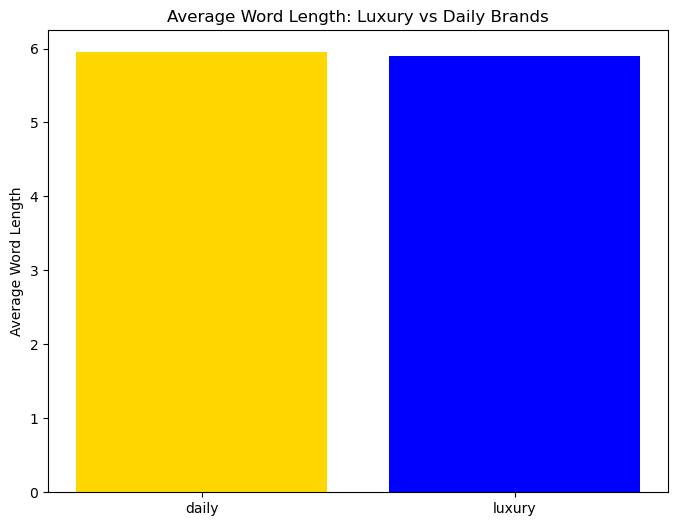

In [32]:
plt.figure(figsize=(8, 6))
plt.bar(style_analysis['brand_type'], style_analysis['avg_word_length'], color=['gold', 'blue'])
plt.title('Average Word Length: Luxury vs Daily Brands')
plt.ylabel('Average Word Length')
plt.show()

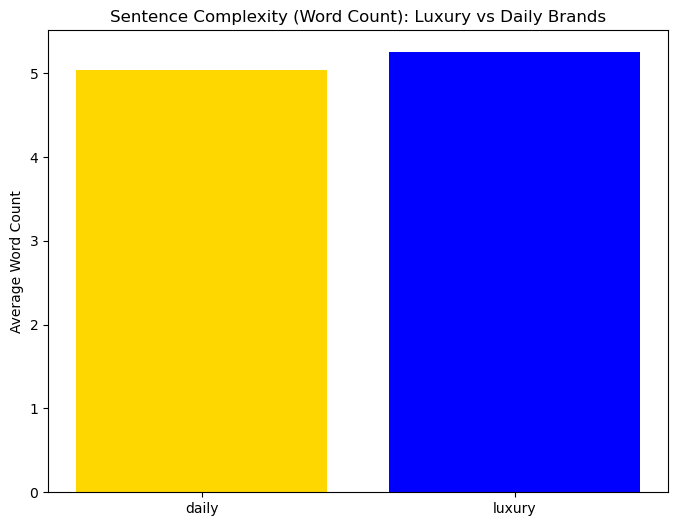

In [34]:
plt.figure(figsize=(8, 6))
plt.bar(style_analysis['brand_type'], style_analysis['word_count'], color=['gold', 'blue'])
plt.title('Sentence Complexity (Word Count): Luxury vs Daily Brands')
plt.ylabel('Average Word Count')
plt.show()

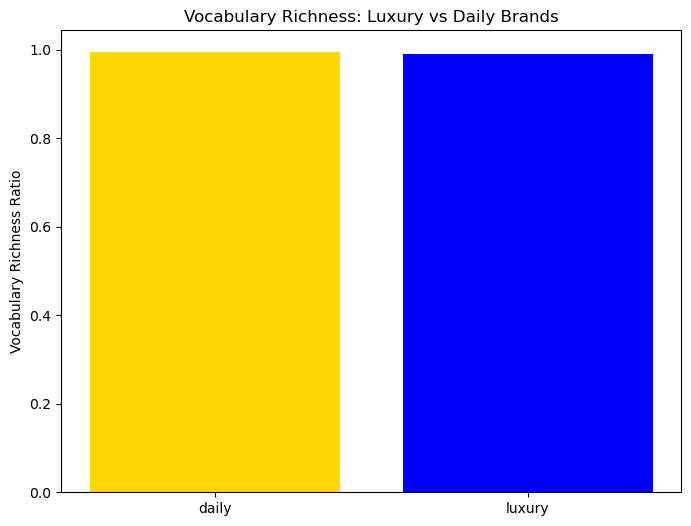

In [36]:
plt.figure(figsize=(8, 6))
plt.bar(style_analysis['brand_type'], style_analysis['vocab_richness'], color=['gold', 'blue'])
plt.title('Vocabulary Richness: Luxury vs Daily Brands')
plt.ylabel('Vocabulary Richness Ratio')
plt.show()